In [20]:
from astropy.table import Table

data_table = Table.read('global_SF6_MM.dat', format='ascii')

print(data_table)

SF6ottoyr SF6ottomon SF6ottoNHm ... SF6ottoSHsd SF6ottoGLm SF6ottoGLsd
--------- ---------- ---------- ... ----------- ---------- -----------
     1995          1      3.533 ...       0.125       3.37       0.064
     1995          2      3.512 ...       0.193      3.397       0.122
     1995          3      3.558 ...        0.12      3.401         0.1
     1995          4      3.618 ...        0.17      3.453       0.094
     1995          5      3.626 ...       0.139      3.467       0.099
     1995          6      3.551 ...       0.112      3.424       0.081
     1995          7      3.677 ...       0.124       3.47       0.078
      ...        ...        ... ...         ...        ...         ...
     2013          6        nan ...         nan        nan         nan
     2013          7        nan ...         nan        nan         nan
     2013          8        nan ...         nan        nan         nan
     2013          9        nan ...         nan        nan         nan
     2

In [31]:
cleaned_data_df = data_df.dropna()

In [32]:
print(cleaned_data_df)

     SF6ottoyr  SF6ottomon  SF6ottoNHm  SF6ottoNHsd  SF6ottoSHm  SF6ottoSHsd  \
0         1995           1       3.533        0.029       3.207        0.125   
1         1995           2       3.512        0.154       3.282        0.193   
2         1995           3       3.558        0.159       3.244        0.120   
3         1995           4       3.618        0.090       3.287        0.170   
4         1995           5       3.626        0.133       3.308        0.139   
..         ...         ...         ...          ...         ...          ...   
212       2012           9       7.793        0.025       7.470        0.029   
213       2012          10       7.838        0.027       7.498        0.044   
214       2012          11       7.867        0.029       7.523        0.032   
215       2012          12       7.897        0.025       7.564        0.038   
216       2013           1       7.924        0.024       7.626        0.038   

     SF6ottoGLm  SF6ottoGLsd  
0       

In [33]:
import pandas as pd

selected_columns = ['SF6ottoyr', 'SF6ottoGLm', 'SF6ottoGLsd']
selected_data_table = data_table[selected_columns]

data_df = selected_data_table.to_pandas()

cleaned_data_df = data_df.dropna()

cleaned_data_df.columns = ['date', 'global_mean_concentration', 'global_mean_concentration_sd']

cleaned_data_df

,date,global_mean_concentration,global_mean_concentration_sd
0,1995,3.370,0.064
1,1995,3.397,0.122
2,1995,3.401,0.100
3,1995,3.453,0.094
4,1995,3.467,0.099
...,...,...,...
212,2012,7.631,0.019
213,2012,7.668,0.026
214,2012,7.695,0.022
215,2012,7.730,0.022


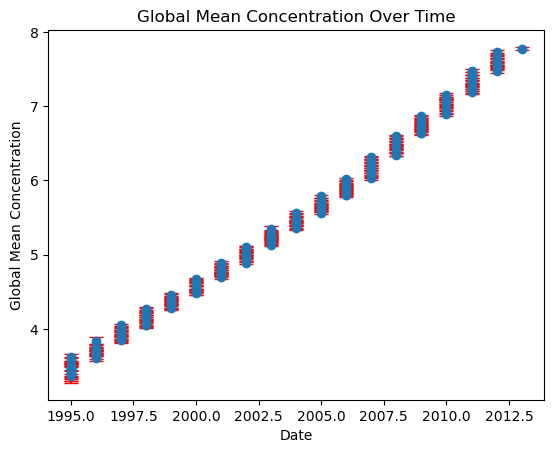

In [34]:
import matplotlib.pyplot as plt


plt.errorbar(cleaned_data_df['date'], cleaned_data_df['global_mean_concentration'], yerr=cleaned_data_df['global_mean_concentration_sd'], fmt='o', ecolor='r', capsize=5)
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean Concentration Over Time')
plt.show()

In [35]:
import numpy as np

coefficients = np.polyfit(cleaned_data_df['date'], cleaned_data_df['global_mean_concentration'], deg=1)

fitted_values = np.polyval(coefficients, cleaned_data_df['date'])

print('Slope:', coefficients[0])
print('Intercept:', coefficients[1])

Slope: 0.238360326648622
Intercept: -472.1343311368424


In [36]:
residuals = cleaned_data_df['global_mean_concentration'] - fitted_values

chi_squared = np.sum((residuals / cleaned_data_df['global_mean_concentration_sd']) ** 2) / (len(data_df) - 2) 

print('Reduced chi-squared value:', chi_squared)

Reduced chi-squared value: 20.831438893079753


In [37]:
print('Parameters:')
print('Slope:', coefficients[0])
print('Intercept:', coefficients[1])
print('Equation: y = {:.6f}x + {:.6f}'.format(coefficients[0], coefficients[1]))
print('Reduced chi-squared value:', chi_squared)

Parameters:
Slope: 0.238360326648622
Intercept: -472.1343311368424
Equation: y = 0.238360x + -472.134331
Reduced chi-squared value: 20.831438893079753


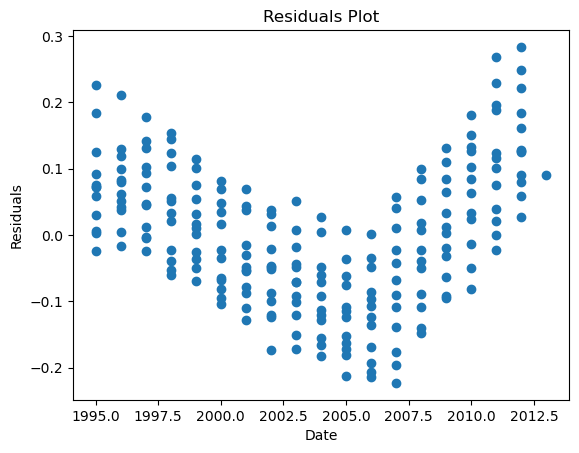

In [39]:
plt.scatter(cleaned_data_df['date'], residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
#since there is a pattern in the risidual plot, I do not think a linear model seems appropriate. 
